(sec:linregr)=
# Linear Regression

In this section, we illustrate the preceding concepts for the case of a linear regression model. The probabilistic concepts are applied to the linear setting and the connection to classical (deterministic) methods are shown. 

We assume the following setting:
- Some data of the form  
  
  $$\mathcal{D} = \{ (x_i, y_i)~|~x_i, y_i \in \mathbb{R} \quad \text{for } i = 1,\dots, n\}$$
  
  is given
- The data $\mathcal{D}$ is collected from observation with the relation  
  
  $$y_i = \beta~x_i + \varepsilon_i,$$
  
  where $\beta \in \mathbb{R}$ and $\varepsilon_i \sim \mathcal{N}(0, \sigma_n^2)$, $i=1, \dots, n$ are independent normally distributed random variables. For simplicity, we suppose that $\sigma_n^2$ is known.
  
$\varepsilon_i$ represents some error term (e.g. measurement errors) which is also called **noise**. The **unknown** coefficient $\beta$ is called slope. Please note that the outputs $y_i$, $i=1,\dots,n$, are also independent normally distributed random variables with distribution $\mathcal{N}(\beta~x_i, \sigma_n^2)$. $x$ and $y$ denote vectors containing all $x_i$ and $y_i$, $i=1,\dots,n$, respectively.

Our goal is to use the information in $\mathcal{D}$ to estimate $\beta$ in an appropiate way. In use of these estimates, it is possible to make predictions for new inputs $x^*$. Similarly, the probabilistic concepts are applied later on to more advanced models.

For the purpose of visualization, we generate a linear function as well as some samples:

In [1]:
import numpy as np
from scipy.stats import uniform, norm, laplace
import matplotlib.pyplot as plt

# set seed
np.random.seed(seed=3141592)

# generate true value of beta randomly
# in use of a standard normal distribution
beta = norm.rvs(loc=0, scale=1)
interval_length = 1 # lenght of the interval around 0 for x values
boundary = np.array([-interval_length/2, interval_length/2]) # auxiliary array for plots

n = 10 # number of observations
sigma2 = 0.05 # noise level

# generate data
x = interval_length * uniform.rvs(size=n) - interval_length/2 # x values
y = beta * x + norm.rvs(loc=0, scale=np.sqrt(sigma2), size=n) # y values

print("beta = {:1.4f}".format(beta))

beta = -0.4955


## Ordinary Least Squares

The most common approach is to choose an estimate $\hat{\beta}^{\text{OLS}}$ for $\beta$ such that the **sum of squared resiudals** (SSR) (or residual sum of squares (RSS)) between observations and predictions is minimized, i.e.,

$$\hat{\beta}^{\text{OLS}} = \underset{\beta}{\text{argmin}}~\sum_{i=1}^n \big(y_i - \beta~x_i\big)^2$$

The solution is given by 

$$\hat{\beta}^{\text{OLS}} = \frac{\sum_{i=1}^n x_i ~ y_i }{\sum_{i=1}^n x_i^2} = \frac{x^T y}{x^T x}$$

In our probabilistic setting, the same result is obtained by the **MLE estimate**. Since the observations $y_i$, $i=1,\dots,n$, are independent and $\mathcal{N}(\beta~x_i, \sigma^2)$-distributed, the joint probability density function of $y$ reads

$$p(\mathcal{D}~|~\beta) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi \sigma^2}} ~\exp\Big(-\frac{1}{2}~\frac{(y_i - \beta~x_i)^2}{\sigma^2}\Big)$$

Thus, the MLE yields

$$
\begin{aligned}
\hat{\beta}^{\text{MLE}} &= \underset{\beta}{\text{argmax}} ~\prod_{i=1}^n \frac{1}{\sqrt{2\pi \sigma^2}} ~\exp\Big(-\frac{1}{2}~\frac{(y_i - \beta~x_i)^2}{\sigma^2}\Big) \\
&= \underset{\beta}{\text{argmax}}~ \prod_{i=1}^n~\exp\Big(-\frac{1}{2}~\frac{(y_i - \beta~x_i)^2}{\sigma^2}\Big)
\end{aligned}$$

Since $\ln$ is a monotonically increasing function, we can apply it to the righthand side without changing the $\text{argmax}$. Consequently, it holds

$$
\begin{aligned}
\hat{\beta}^{\text{MLE}} &= \underset{\beta}{\text{argmax}}~ - \frac{1}{2~\sigma^2}~\sum_{i=1}^n~\big(y_i - \beta~x_i\big)^2 \\
        &= \underset{\beta}{\text{argmin}}~\sum_{i=1}^n~\big(y_i - \beta~x_i\big)^2
\end{aligned}
$$

i.e., the MLE estimate minimizes the SSR and $\hat{\beta}^{\text{MLE}} = \hat{\beta}^{\text{OLS}}$.

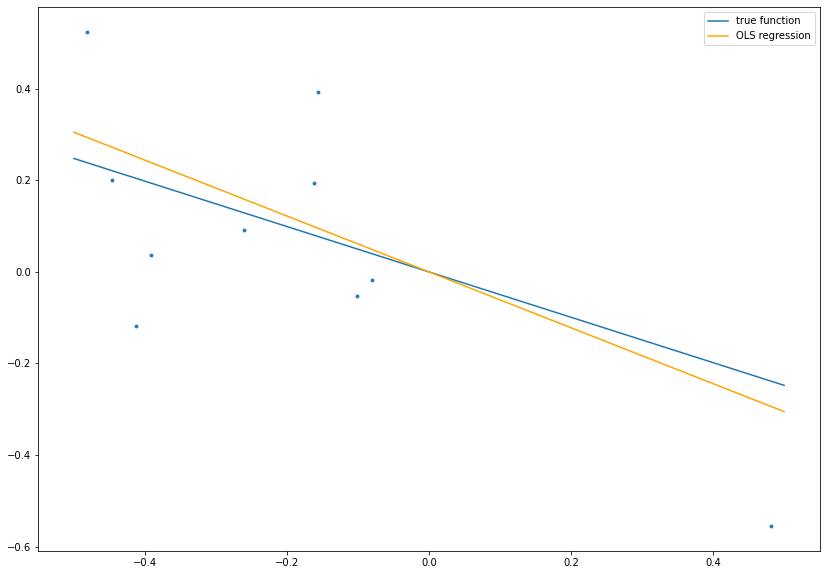

In [2]:
# calculate OLS estimate
betaOLS = np.dot(x, y)/np.dot(x, x)

# plot data, true function and OLS result
fig= plt.figure(figsize=(14, 10))
plt.scatter(x ,y, s=8.)
plt.plot(boundary, beta*boundary, label='true function')
plt.plot(boundary, betaOLS*boundary, c='orange', label='OLS regression')
plt.legend()
plt.show()

## Ridge Regression

Instead of minimizing the sum of squared resiudals, it is in some cases useful to introduce an additional **regularization** term. The use of a so-called $L^2$-regularization leads to ridge regression. In this case, the approach is to choose $\hat{\beta}^{\text{Ridge}}$ such that 

$$\hat{\beta}^{\text{Ridge}} = \underset{\beta}{\text{argmin}}~\sum_{i=1}^n \big(y_i - \beta~x_i\big)^2 + \lambda ~\beta^2$$

The regularization term penalizes large values of the slope $\beta$. This means that a steep regression line is not desired. The parameter $\lambda > 0$ is called **complexity parameter** and controls how much influence the regularization has.

Again, the solution can be calculated explicitly and is given by 

$$\hat{\beta}^{\text{Ridge}} = \frac{\sum_{i=1}^n x_i ~ y_i }{\sum_{i=1}^n x_i^2 + \lambda} = \frac{x^T y}{x^T x + \lambda}$$

In our probabilistic setting, the same result is obtained by the **MAP estimate with Gaussian prior**. We assume that $\beta \sim \mathcal{N}(0, \sigma_{\beta}^2)$. This choice expresses the expectation that $\beta$ should probably be close to zero. The variance $\sigma_{\beta}^2$ is a hyperparameter and is the counterpart to the complexity parameter $\lambda$. The MAP estimate $\hat{\beta}^{\text{Gauss}}$ is given by

$$
\begin{aligned}
\hat{\beta}^{\text{Gauss}} &= \underset{\beta}{\text{argmax}} ~p(\mathcal{D}~|~\beta)~p(\beta) \\
&= \underset{\beta}{\text{argmax}} ~\prod_{i=1}^n \frac{1}{\sqrt{2\pi \sigma^2}} ~\exp\Big(-\frac{1}{2}~\frac{(y_i - \beta~x_i)^2}{\sigma^2}\Big)~\frac{1}{\sqrt{2\pi \sigma_{\beta}^2}} ~\exp\Big(-\frac{1}{2}~\frac{\beta^2}{\sigma_{\beta}^2}\Big)
\end{aligned}$$

Please note that $p(\mathcal{D}~|~\beta)~p(\beta)$ is (up to normalization) again a normal distribution. Similarly to the MLE case, by dropping constants and application of $\ln$ the estimate can be rewritten as

$$
\begin{aligned}
\hat{\beta}^{\text{Gauss}} &= \underset{\beta}{\text{argmax}}~ - \frac{1}{2~\sigma^2}~\sum_{i=1}^n~\big(y_i - \beta~x_i\big)^2 - \frac{1}{2~\sigma_{\beta}^2}~\beta^2 \\
&= \underset{\beta}{\text{argmin}}~ \sum_{i=1}^n~\big(y_i - \beta~x_i\big)^2 + \frac{\sigma^2}{\sigma_{\beta}^2}~\beta^2
\end{aligned}$$

Thus, $\hat{\beta}^{\text{Gauss}} = \hat{\beta}^{\text{Ridge}}$ with $\lambda = \frac{\sigma^2}{\sigma_{\beta}^2}$.

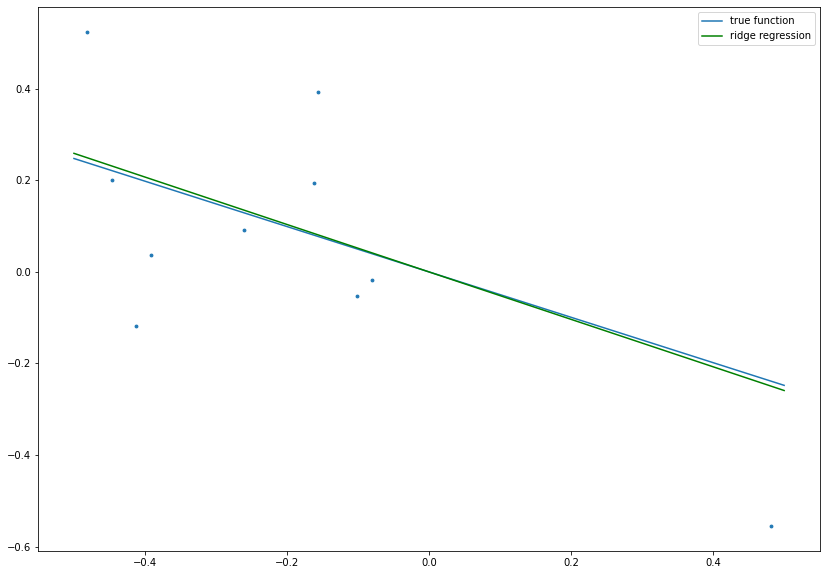

In [3]:
# set complexity parameter for ridge regression
lambdaRidge = 0.2

# calculate ridge regression estimate
betaRidge = np.dot(x, y)/(np.dot(x, x) + lambdaRidge)

# plot data, true function and ridge regression result
fig= plt.figure(figsize=(14, 10))
plt.scatter(x ,y, s=8.)
plt.plot(boundary, beta*boundary, label='true function')
plt.plot(boundary, betaRidge*boundary, c='g', label='ridge regression')
plt.legend()
plt.show()

## LASSO

LASSO (least absolute shrinkage and selection operator) is a regression method that is similar to ridge regression, but usses $L^1$-regularization instead of $L^2$-regularization, i.e., the approach is to choose $\hat{\beta}^{\text{LASSO}}$ such that 

$$\hat{\beta}^{\text{LASSO}} = \underset{\beta}{\text{argmin}}~\sum_{i=1}^n \big(y_i - \beta~x_i\big)^2 + \lambda ~\lvert \beta \rvert$$

The $L^1$-regularization term also penalizes large values of the slope $\beta$, but it is even stronger than $L^2$-regularization for $\lvert \beta \rvert < 1$, since $\lvert \beta \rvert > \beta^2$.

Again, the solution can be calculated explicitly and is given by 

$$
\begin{aligned}
\hat{\beta}^{\text{LASSO}} &= \text{sgn}(\hat{\beta}^{\text{OLS}}) ~ \max\Big(0, \lvert \hat{\beta}^{\text{OLS}} \rvert - \frac{2 \lambda}{\sum_{i=1}^n x_i^2}\Big) \\
&= \text{sgn}(\hat{\beta}^{\text{OLS}}) ~ \max\Big(0, \lvert \hat{\beta}^{\text{OLS}} \rvert - \frac{2 \lambda}{x^T x}\Big),
\end{aligned}
$$

where $\text{sgn}$ denotes the sign function (i.e., $\text{sgn}(x) = 1$ if $x \ge 0$ and $\text{sgn}(x) = -1$ if $x < 0$). In particular, $\hat{\beta}^{\text{LASSO}} = 0$ if the absolute value of $\hat{\beta}^{\text{OLS}}$ is too small.

In our probabilistic setting, the same result is obtained by the **MAP estimate with Laplace prior**. We assume that $\beta \sim \text{Laplace}(0, b)$. Similarly to the Gaussian prior, this choice expresses the expectation that $\beta$ should probably be close to zero, but this distribution is sharper at zero. The MAP estimate $\hat{\beta}^{\text{Laplace}}$ is given by

$$\hat{\beta}^{\text{Laplace}} = \underset{\beta}{\text{argmax}} ~\Big(\prod_{i=1}^n \frac{1}{\sqrt{2\pi \sigma^2}} ~\exp\Big(-\frac{1}{2}~\frac{(y_i - \beta~x_i)^2}{\sigma^2}\Big)\Big)~\frac{1}{2b}~\exp\Big(-\frac{\lvert \beta \rvert}{b}\Big)$$

Similarly as before, by dropping constants and application of $\ln$ the estimate can be rewritten as

$$
\begin{aligned}
\hat{\beta}^{\text{Laplace}} &= \underset{\beta}{\text{argmax}}~ - \frac{1}{2~\sigma^2}~\sum_{i=1}^n~\big(y_i - \beta~x_i\big)^2 - \frac{1}{b}~\lvert \beta \rvert \\
&= \underset{\beta}{\text{argmin}}~ \sum_{i=1}^n~\big(y_i - \beta~x_i\big)^2 + \frac{2 \sigma^2}{b}~\lvert \beta \rvert
\end{aligned}$$

Thus, $\hat{\beta}^{\text{Laplace}} = \hat{\beta}^{\text{LASSO}}$ with $\lambda = \frac{2\sigma^2}{b}$.

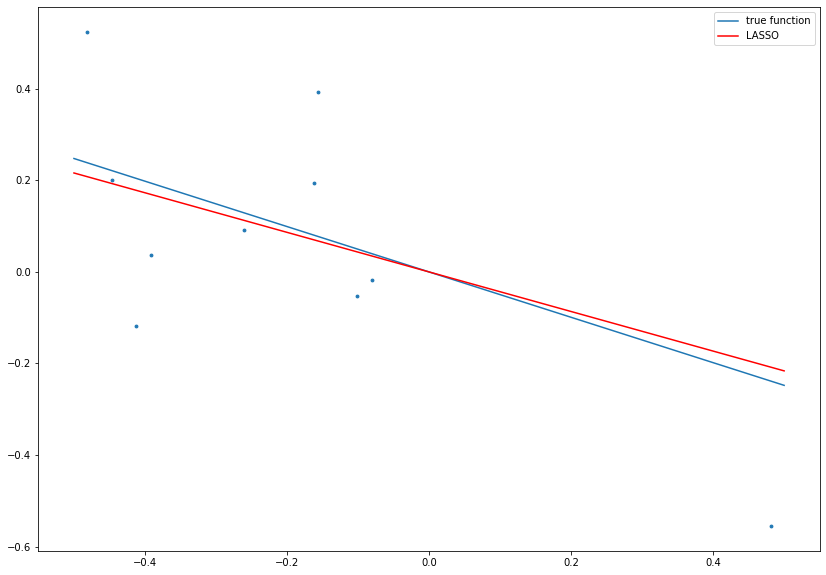

In [4]:
# set complexity parameter for LASSO
lambdaLASSO = 0.1

# calculate LASSO estimate
betaLASSO = np.sign(betaOLS) * np.maximum(0, np.abs(betaOLS) - 2*lambdaLASSO/np.dot(x, x))

# plot data, true function and LASSO result
fig= plt.figure(figsize=(14, 10))
plt.scatter(x ,y, s=8.)
plt.plot(boundary, beta*boundary, label='true function')
plt.plot(boundary, betaLASSO*boundary, c='r', label='LASSO')
plt.legend()
plt.show()

OLS, ridge regression and LASSO can also be generalized to higher dimensions, i.e., instead of scalar values for $x$ and $\beta$ $d$-dimensional vectors can be considered. In particular, in this more general setting LASSO is used to discard input variables, since the regularization yields $\beta_j = 0$ if the $j$-th variables does not seem to have an impact on $y$.

## Bayesian Linear Regression

In the ridge regression section, we have already mentioned that the use of a Gaussian prior $\mathcal{N}(0, \sigma_{\beta}^2)$ for $\beta$ results in a Gaussian posterior. In other words, the Gaussian distribution is its own conjugate prior. 

In order to obtain the posterior distribution, it remains to determine its mean and variance. In detail, it holds

$$
\begin{aligned}
p(\mathcal{D}~|~\beta)~p(\beta) &\propto \prod_{i=1}^n \exp\Big(-\frac{1}{2}~\frac{\big(y_i - \beta~x_i\big)^2}{\sigma^2}\Big)~\exp\Big(-\frac{1}{2}~\frac{\beta^2}{\sigma_{\beta}^2}\Big) \\
&= \exp\Big(-\frac{1}{2}~\Big(\sum_{i=1}^n \frac{\big(y_i - \beta~x_i\big)^2}{\sigma^2} + \frac{\beta^2}{\sigma_{\beta}^2}\Big)\Big) \\
&= \exp\Big(-\frac{1}{2}~\frac{y^T y - 2 x^T y \beta + x^Tx \beta^2}{\sigma^2} + \frac{\beta^2}{\sigma_{\beta}^2}\Big) \\
&\propto \exp\Big(-\frac{1}{2}~\frac{x^Tx ~ \beta^2 - 2 x^T y ~ \beta}{\sigma^2} + \frac{\beta^2}{\sigma_{\beta}^2}\Big) \\
&= \exp\Big(-\frac{1}{2}~\frac{\big(x^Tx + \frac{\sigma^2}{\sigma_{\beta}^2}\big) ~ \beta^2 - 2 x^T y ~ \beta}{\sigma^2}\Big) \\
&= \exp\Big(-\frac{1}{2}~\frac{\beta^2 - 2 \beta~\Lambda^{-1} x^T y}{\sigma^2 \Lambda^{-1}}\Big) \\
&\propto \exp\Big(-\frac{1}{2}~\frac{\big(\beta - \Lambda^{-1} x^T y\big)^2}{\sigma^2 \Lambda^{-1}}\Big) 
\end{aligned}
$$
where $\Lambda := x^Tx + \frac{\sigma^2}{\sigma_{\beta}^2}$. Thus, $\mathcal{N}(\tilde{\mu}, \tilde{\sigma}^2)$ is the posterior distribution with mean

$$\tilde{\mu} = \Lambda^{-1} x^T y = \frac{x^T y}{x^Tx + \frac{\sigma^2}{\sigma_{\beta}^2}}$$

and variance 

$$\tilde{\sigma}^2 = \sigma^2 \Lambda^{-1} = \frac{\sigma^2}{x^Tx + \frac{\sigma^2}{\sigma_{\beta}^2}} = \Big(\frac{x^Tx}{\sigma^2} + \frac{1}{\sigma_{\beta}^2}\Big)^{-1}.$$ 

Please note that the mean $\tilde{\mu}$ equals the MAP estimate $\hat{\beta}^{\text{Gauss}}$ which is used in ridge regression.

Bayesian linear regression has the nice property that the prediction $y^* = \beta~x^*$ for a test point $x^* \in \mathbb{R}$ is again normally distributed, since $\beta \sim \mathcal{N}(\tilde{\mu}, \tilde{\sigma}^2)$, i.e., $y^* \sim \mathcal{N}(x^* ~ \tilde{\mu}, (x^*)^2~\tilde{\sigma}^2)$. In particular, credible bounds for $y^*$ can be computed. Additionally to the expected value of the output, the **model is also able to quantify its own uncertainty**! This is a huge advantage and a major reason to use probabilistic models. Furthermore, it is also useful to consider the additional noise term which leads to the distribution of $\beta~x^* + \varepsilon^*$ with $\varepsilon^* \sim \mathcal{N}(0, \sigma^2)$. The noise is assumed to be independent of $\beta$ and therefore, it follows 

$$\beta~x^* + \varepsilon^* \sim \mathcal{N}(x^* ~ \tilde{\mu}, (x^*)^2~\tilde{\sigma}^2 + \sigma^2).$$

$(x^*)^2~\tilde{\sigma}^2$ is also called **epistemic uncertainty** (caused by lack of knowledge of the model) and $\sigma^2$ is called **aleatoric uncertainty** (caused by the noise which can not be reduced by an improved model).

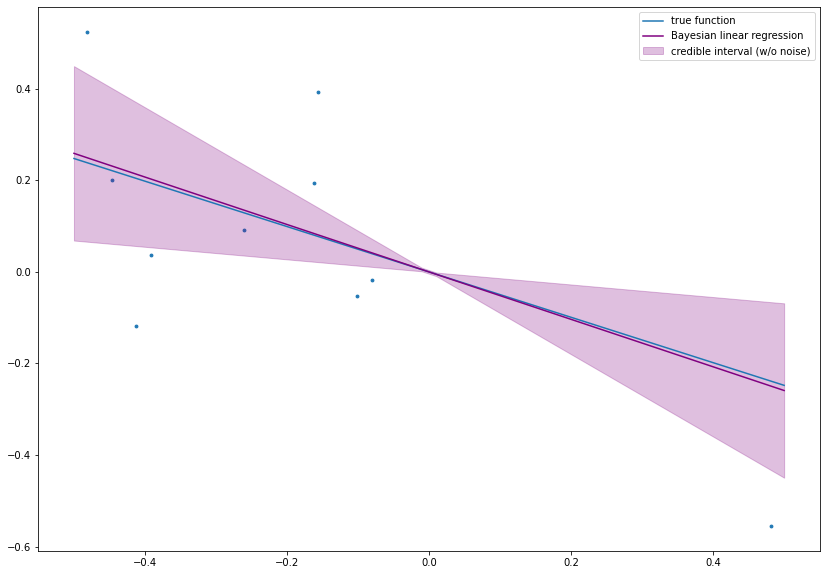

In [5]:
# choose prior variance such that posterior mean equals betaRidge
sigma2_beta = sigma2/lambdaRidge # prior variance
posterior_mean = np.dot(x, y)/(np.dot(x, x) + sigma2/sigma2_beta)
posterior_var = sigma2 / (np.dot(x, x) + sigma2/sigma2_beta)

# calculate mean predictions and variances on testpoints
xstar = np.linspace(-interval_length/2, interval_length/2, num=50)
ystar_mean = posterior_mean * xstar
ystar_var = posterior_var * np.square(xstar)

# plot data, true function and Bayesian linear regression result
fig= plt.figure(figsize=(14, 10))
plt.scatter(x ,y, s=8.)
plt.plot(boundary, beta*boundary, label='true function')
plt.plot(xstar, ystar_mean, c='purple', label='Bayesian linear regression')
plt.fill_between(xstar, ystar_mean - 1.96 * np.sqrt(ystar_var), ystar_mean + 1.96 * np.sqrt(ystar_var), 
                 color='purple', alpha=.25, label='credible interval (w/o noise)')
plt.legend()
plt.show()

In the case that the variance $\sigma^2$ of the noise term is not known, it is also possible to perform Bayesian inference on $\beta$ and $\sigma^2$ simultaneously. In this case, the inverse gamma distribution would be used as prior distribution for $\sigma^2$.

## Visualization

To visualize and to compare the preceding models for different parameter values please open the notebook in Google Colab and use the application below.

In [6]:
from IPython.display import display, clear_output
!pip install ipympl
clear_output()
import numpy as np
from scipy.stats import uniform, norm
import matplotlib.pyplot as plt
from ipywidgets import interact, interact_manual
import ipywidgets as widgets

# function to # generate data of linear function
def generate(interval_length, n, sigma2):
    beta = norm.rvs(loc=0, scale=1)
    x = interval_length * uniform.rvs(size=n) - interval_length/2 # x values
    y = beta * x + norm.rvs(loc=0, scale=np.sqrt(sigma2), size=n) # y values
    return beta, sigma2, interval_length, x, y

il_w = widgets.IntSlider(value=1, min=1, max=10, description='interval length')
n_w = widgets.IntSlider(value=10, min=5, max=40, description='n')
sigma2_w = widgets.FloatSlider(value=0.05, min=0.01, max=0.2, step=0.01, description='sigma2')

estimates_w = widgets.SelectMultiple(
                  options=['OLS', 'Ridge', 'LASSO', 'Bayesian'],
                  value=['OLS', 'Ridge', 'LASSO'],
                  description='Estimates')

# auxiliary function for plots
def _plot(interval_length, beta, x, y, estimates,
          betaOLS, betaRidge, betaLASSO, 
          posterior_mean, posterior_var):
    # calculate mean predictions and variances on testpoints
    xstar = np.linspace(-interval_length/2, interval_length/2, num=50)
    ystar_mean = posterior_mean * xstar
    ystar_var = posterior_var * np.square(xstar)

    # get plot
    boundary = np.array([-interval_length/2, interval_length/2])
    fig= plt.figure(figsize=(14, 10))
    fig.canvas.header_visible = False
    plt.scatter(x ,y, color='b', s=8.)
    plt.plot(boundary, beta*boundary, c='b', label='true function')
    if 'OLS' in estimates:
        plt.plot(boundary, betaOLS*boundary, c='orange', label='OLS')
    if 'Ridge' in estimates:
        plt.plot(boundary, betaRidge*boundary, c='g', label='ridge regression')
    if 'LASSO' in estimates:
        plt.plot(boundary, betaLASSO*boundary, c='r', label='LASSO')
    if 'Bayesian' in estimates:
        plt.plot(xstar, ystar_mean, c='purple', label='Bayesian linear regression')
        plt.fill_between(xstar, 
                         ystar_mean - 1.96 * np.sqrt(ystar_var), 
                         ystar_mean + 1.96 * np.sqrt(ystar_var), 
                         color='purple', 
                         alpha=.25, label='credible interval (w/o noise)')
    plt.legend()
    plt.show()

In [7]:
@interact(interval_length=il_w,
                 n=n_w,
                 sigma2=sigma2_w)
def lin_func(interval_length, n, sigma2):
    # generate linear function and data
    beta, sigma2, interval_length, x, y = generate(interval_length, n, sigma2)
    
    # perform linear regression
    @interact_manual(estimates=estimates_w, 
              lambdaRidge=(0., 1., 0.01),
              lambdaLASSO=(0., 1., 0.01),
              sigma2_beta=(0., 0.25, 0.01))
    def lin_reg(estimates,
                lambdaRidge=0.2, lambdaLASSO=0.1, sigma2_beta=0.1):

        # calculate OLS, ridge and LASSO estimates
        betaOLS = np.dot(x, y)/np.dot(x, x)
        betaRidge = np.dot(x, y)/(np.dot(x, x) + lambdaRidge)
        betaLASSO = np.sign(betaOLS) * np.maximum(0, np.abs(betaOLS) - 2*lambdaLASSO/np.dot(x, x))

        # Bayesian linear regression
        posterior_mean = np.dot(x, y)/(np.dot(x, x) + sigma2/sigma2_beta)
        posterior_var = sigma2 / (np.dot(x, x) + sigma2/sigma2_beta)
        
        params = (interval_length, beta, x, y, estimates,
                  betaOLS, betaRidge, betaLASSO, 
                  posterior_mean, posterior_var)
        
        # get plot
        _plot(*params)

interactive(children=(IntSlider(value=1, description='interval length', max=10, min=1), IntSlider(value=10, de…